In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
size = 20000
race_df = pd.read_csv('ACS_16_race.csv', nrows=size)
vac_df = pd.read_csv('311 Vacant.csv', nrows=size)
geo_df = gpd.read_file('Boundaries.geojson')

In [10]:
vac_df.dropna(inplace=True)
race_df.dropna(inplace=True)
vac_df['zip'] = vac_df['ZIP CODE'].astype(int)
race_df['zip'] = race_df['zip'].astype(int)
geo_df['zip'] = geo_df['zip'].astype(int)

In [15]:
race_df.columns

Index(['zip', 'white_pop'], dtype='object')

# Choropleth Maps with geopandas


geopandas.read_file takes in a geojson file and creates a GeoDataFrame. You can read more about it from the geopandas api. The GeoDataFrame can then be plotted right off the bat:

In [11]:
geo_df.head()

,objectid,shape_len,zip,shape_area,geometry
0,33,42720.0444058,60647,106052287.488,(POLYGON ((-87.67762151065281 41.9177578010629...
1,34,48103.7827213,60639,127476050.762,(POLYGON ((-87.72683253163021 41.9226462671259...
2,35,27288.6096123,60707,45069038.4783,(POLYGON ((-87.78500237831095 41.9091478547167...
3,36,42527.9896789,60622,70853834.3797,(POLYGON ((-87.6670686895295 41.88885188496992...
4,37,47970.1401531,60651,99039621.2518,(POLYGON ((-87.70655631674127 41.8955534069940...


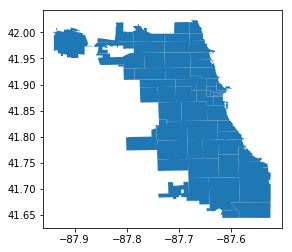

In [12]:
geo_df.plot()

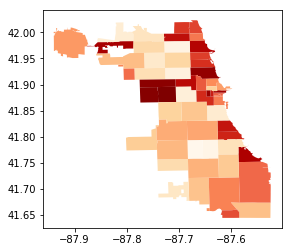

In [13]:
geo_df.plot(column='shape_area', cmap='OrRd')

In [20]:
race_zip_counts = race_df.groupby('zip').count()
vac_zip_counts = vac_df.groupby('zip').count()

r_zipcounts = pd.DataFrame({'zip':race_zip_counts.index, 'count': race_zip_counts['white_pop']})
v_zipcounts = pd.DataFrame({'zip': vac_zip_counts.index, 'count': vac_zip_counts['Ward']})
print(r_zipcounts.head())
print(v_zipcounts.head())

       count    zip
zip                
60002      1  60002
60004      1  60004
60005      1  60005
60007      1  60007
60008      1  60008
       count    zip
zip                
60607      2  60607
60608     18  60608
60609     81  60609
60610      1  60610
60611      1  60611


In [21]:
rjoined = geo_df.join(r_zipcounts, on='zip', how='left', lsuffix='l', rsuffix='r')
vjoined = geo_df.join(v_zipcounts, on='zip', how='left', lsuffix='l', rsuffix='r')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


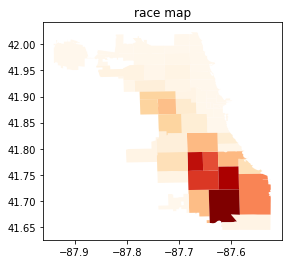

In [27]:
vjoined.plot(column='count', cmap='OrRd')
plt.title('race map')
plt.show()

# Heatmaps with folium

In [30]:
vac_xy = vac_df[['LATITUDE', 'LONGITUDE']]

In [31]:
import folium
from folium.plugins import HeatMap

In [32]:
print(vac_xy.mean())

LATITUDE     41.776356
LONGITUDE   -87.650908
dtype: float64


In [40]:
hmap = folium.Map(location=[41.87, -87.69], zoom_start=10)
hm_vac = HeatMap(list(zip(vac_xy['LATITUDE'].values, vac_xy['LONGITUDE']
                                                      .values)), radius=14, blur=20)
hmap.add_child(hm_vac)

In [51]:
small_vac = vac_df[['ZIP CODE', 'SERVICE REQUEST NUMBER']]
small_vac.groupby('ZIP CODE').count().head()

,SERVICE REQUEST NUMBER
ZIP CODE,
60607.0,2
60608.0,18
60609.0,81
60610.0,1
60611.0,1


In [52]:
mymap = folium.Map(location=[41.87, -87.69], zoom_start=10)
my_vac = HeatMap(list(zip(small_vac['ZIP CODE'].values)), radius=14, blur=20)
hmap.add_child(hm_vac)